<a href="https://colab.research.google.com/github/qsergean/Most-frequent-colors/blob/main/ml_kmeans_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача: найти доминирующие цвета на изображении


Попробуйте сделать в 2-х вариантах: выделить 5 главных цветов с помощью kmeans и попробуйте реализовать метод dbscan, не задавая кол-во цветов.
На изображении каждый пиксель позиционируется в трёхмерном пространстве RGB, картинку для оптимизации можно уменьшить до 200х200 с помощью библиотеки PIL. Она так же используется для извлечения значений RGB.
Результат выполнения задачи – блокнот Jupyter Notebook, в начале считывается изображение, приводится к виду – набор точек в трехмерном пространстве RGB, к точкам применяются алгоритмы кластеризации, на выходе – выделенные основных цветов.  При проверке блокнота я буду задавать свое изображение.
Пример считывания изображение и получения точек (для дальнейшей кластеризации) в трехмерном пространстве RGB:
```
from collections import namedtuple
try:
    import Image
except ImportError:
    from PIL import Image

Point = namedtuple('Point', ('coords', 'n', 'ct'))

def get_points(img):
    points = []
    w, h = img.size
    for count, color in img.getcolors(w * h):
        points.append(Point(color, 3, count))
    return points

img = Image.open(filename)
img.thumbnail((200, 200))
w, h = img.size
points = get_points(img)

```



### Скачивание изображений

In [ ]:
!wget -O "kek.jpg" "https://iknowyourmeme.files.wordpress.com/2016/04/14280761127830.jpg?w=616"
!wget -O "rgb.jpg" "https://i.stack.imgur.com/01XJ7.png"
!wget -O "shrek.jpg" "https://lh3.googleusercontent.com/2hDpuTi-0AMKvoZJGd-yKWvK4tKdQr_kLIpB_qSeMau2TNGCNidAosMEvrEXFO9G6tmlFlPQplpwiqirgrIPWnCKMvElaYgI-HiVvXc=w600"
!wget -O "monalisa.jpg" "https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Mona_Lisa-restored.jpg/1200px-Mona_Lisa-restored.jpg"
!wget -O "homer.jpg" "https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F13%2F2015%2F04%2F05%2Ffeatured.jpg&q=60"

### Преобразование изображения в массив RGB

In [ ]:
from collections import namedtuple
from PIL import Image
import numpy as np

Point = namedtuple('Point', ('coords', 'n', 'ct'))

def get_points(img):
    points = []
    w, h = img.size
    for count, color in img.getcolors(w * h):
        points.append(Point(color, 3, count))
    return points

filename = "kek.jpg"
img = Image.open(filename)
img.thumbnail((200, 200))
w, h = img.size
points = get_points(img)

arr = np.zeros(np.shape(points), dtype = int)
i = 0
for row in points:
  j = 0
  while (j < 3):
    arr[i][j] = row[0][j]
    j += 1
  i += 1

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


### Визуализация распределения цветов

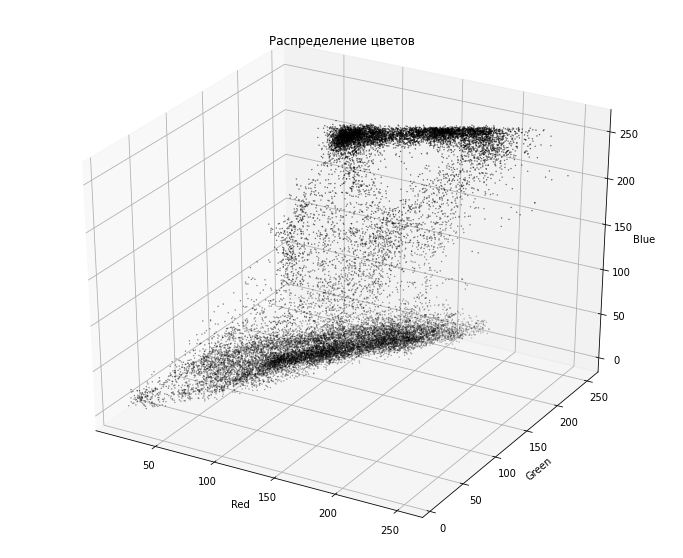

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
# %matplotlib --list
import numpy as np
import matplotlib.pyplot as plt

# x = np.linspace(0,255,256)
# y = np.linspace(0,255,256)
# z = np.linspace(0,255,256)

# fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax = plt.axes(projection='3d')
ax.scatter(arr[:, 0],arr[:, 1], arr[:, 2], color='black', s=0.1);
plt.title("Распределение цветов")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

# Метод kmeans

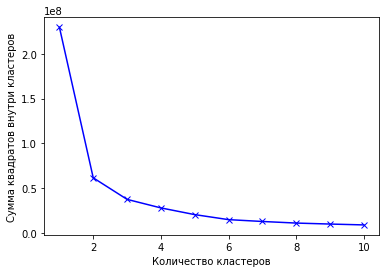

In [ ]:
from sklearn.cluster import KMeans
sq = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(arr)
    sq.append(kmeans.inertia_)
plt.plot(range(1, 11), sq, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов внутри кластеров')
plt.show()

### Попытка автоматизировать подбор k. Лучше задать ```n_clusters``` вручную.

In [ ]:
# sq = list(map(int, sq))
i = 0
eps = 10

while (i + 1 < len(sq)):
  print (i, sq[i] / sq[i+1])
  if (sq[i] / sq[i + 1] < 1.4):
    n_clusters = i
    break 
  i+=1

0 3.7381411625006695
1 1.6436992722103876
2 1.3428849975807637


### Так как нужно найти 5 цветов, считаю ```n_clusters = 5```

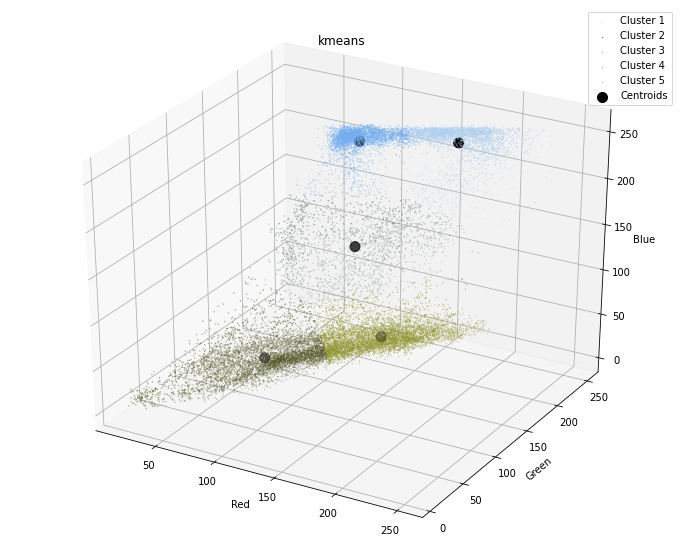


Most frequent colors: 
 [[178 209 240]
 [ 84  88  38]
 [147 151  48]
 [127 147 144]
 [115 175 240]]


In [ ]:
n_clusters = 5
kmeans = KMeans(n_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(arr)

res = np.asarray(kmeans.cluster_centers_, dtype=int)

def get_cmap(n, name='brg'):
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(n_clusters)
ax = plt.axes(projection='3d')
i = 0
while (i < n_clusters):
  ax.scatter(arr[y_kmeans == i, 0], arr[y_kmeans == i, 1], arr[y_kmeans == i, 2], s = 0.1, color = tuple(res[i]/256), label = f'Cluster {i + 1}')
  i += 1
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'black', label = 'Centroids')
plt.title('kmeans')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

# res = np.asarray(kmeans.cluster_centers_, dtype=int)
print("\nMost frequent colors: \n", res)

### Отображение самых частых цветов

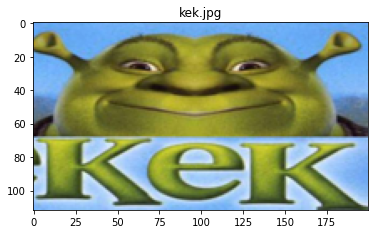

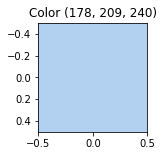

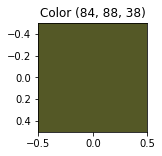

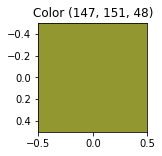

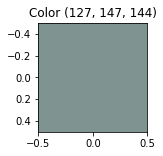

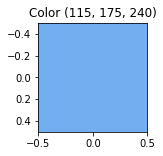

In [ ]:
plt.imshow(img)
plt.title(f"{filename}")
plt.show()
fig = plt.gcf()
fig.set_size_inches(0.5,0.5)
for i in range (0,5):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  test = Image.new("RGB", (1, 1), tuple(res[i]))
  plt.title(f"Color {tuple(res[i])}")
  plt.imshow(test)
  plt.show()

# DBSCAN
Здесь я не пытаюсь автоматизировать, подбираю расстояние между соседями и мощность кластера вручную

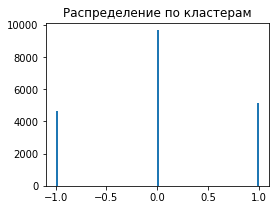

In [ ]:
from sklearn.cluster import DBSCAN
DBSCAN_cluster = DBSCAN(eps=6.5, min_samples=50).fit(arr)
labels = DBSCAN_cluster.labels_

fig = plt.gcf()
fig.set_size_inches(4, 3)
plt.hist(labels, bins=100)
plt.title("Распределение по кластерам")
plt.show()

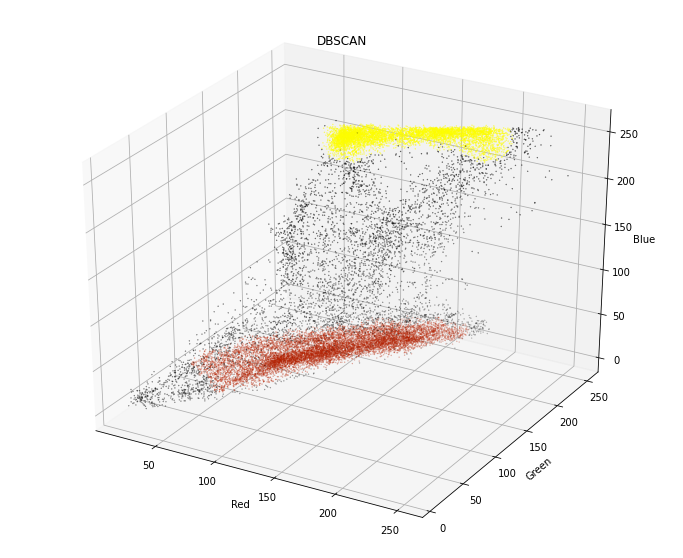

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(arr[:, 0], arr[:,1], arr[:,2], c = labels, cmap= "gnuplot", s = 0.1)
plt.title('DBSCAN')
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()